In [ ]:
### IMPORT NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LOAD DATA 

In [ ]:
data = pd.read_csv("titanic-passengers.csv", delimiter =";")

### Data Preprocessing Phase 

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [5]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [7]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,True,False,False,False,False,True,False


In [ ]:
#The code below gives the summary of missing values encountered in the dataset

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### DATA CLEANING SECTION

In [ ]:
#It is observed that Age, Embarked and the Cabin column had missing values, hence the need to cleaning the dataset in these columns.

#AGE: The cleaning is done by filling the missing values with the mean age.

#EMBARKED: The cleaning is done by filling the missing values with the most occurent data.

#CABIN: The cleaning is done by filling the missing values with 0.

### Replacing missing numerical values with appropriate value

In [10]:
data['Age'].fillna(data['Age'].mean(),inplace= True)

### Replace missing categorical values with appropriate value

In [ ]:
#count the number of elements in "Cabin"

In [11]:
print (data["Cabin"].value_counts())

C23 C25 C27    4
G6             4
B96 B98        4
C22 C26        3
E101           3
              ..
D46            1
C106           1
D47            1
A23            1
C87            1
Name: Cabin, Length: 147, dtype: int64


In [ ]:
#Fillin the missing values with the highest one of the highest occuring elements

In [12]:
data["Cabin"].fillna("G6",inplace = True)

In [ ]:
#The same should be done for the "Embarked" column 

In [13]:
print(data["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [14]:
data["Embarked"].fillna("s",inplace= True)

### Check to confirm missing values have been replaced

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [16]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
data.head(20)

### Notice that the values of the Ages are in floats, we have to convert it to integers

In [17]:
data["Age"]= data["Age"].astype(int)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(6)
memory usage: 80.2+ KB


In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31,1,0,F.C. 12750,52.0000,B71,S


### VISUALIZATION PHASE

### Distribution of most important features

#### "Age" feature distribution

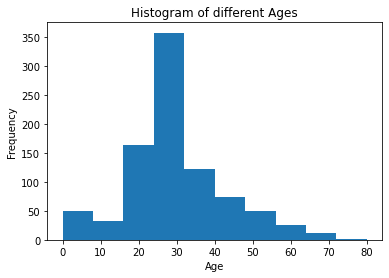

In [22]:
plt.title("Histogram of different Ages")
plt.xlabel("Age")
data["Age"].plot.hist()

#### "Sex" feature distribution

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

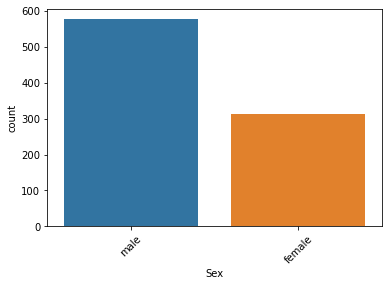

In [23]:
sns.countplot(x="Sex", data = data)
plt.xticks(rotation=45)

#### "Pclass" feature distribution

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

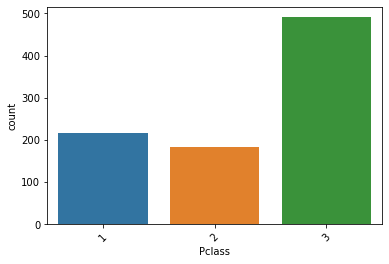

In [25]:
sns.countplot(x="Pclass",data = data)
plt.xticks(rotation= 45)

#### "Embarked" feature distribution

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

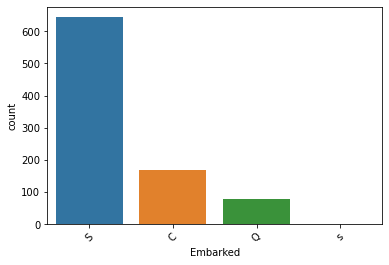

In [26]:
sns.countplot(x= "Embarked", data = data)
plt.xticks(rotation = 45)

### Correlation between "Sex" and "Age"

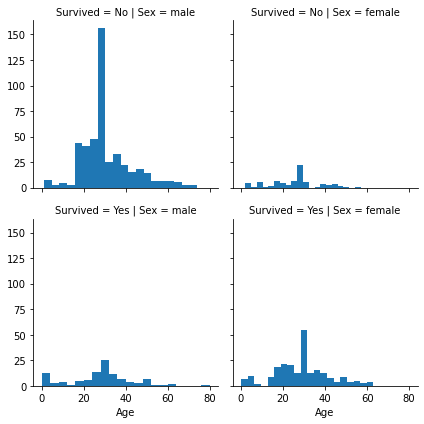

In [29]:
g =sns.FacetGrid(data, row = "Survived", col= "Sex")
g.map(plt.hist,"Age", bins = 20)

### Correlation between "Pclass" and "Embarked"

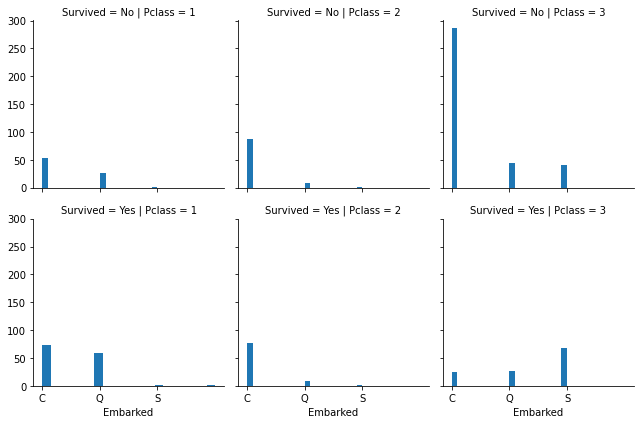

In [30]:
g =sns.FacetGrid(data, row = "Survived", col= "Pclass")
g.map(plt.hist,"Embarked", bins = 20)

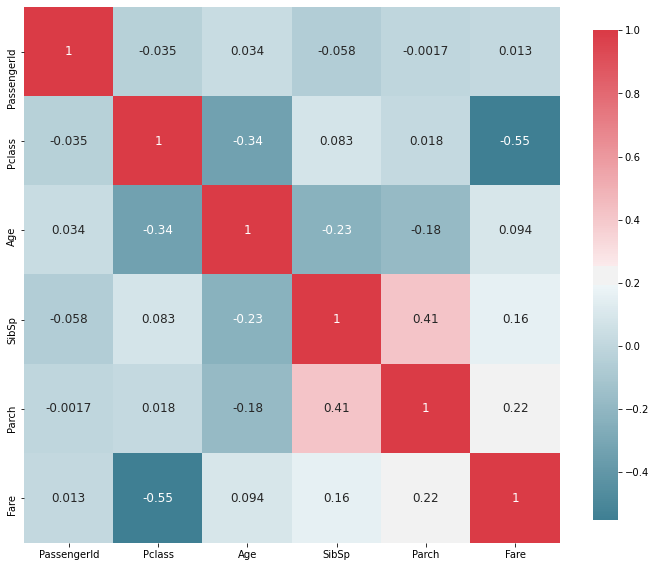

In [37]:
def plot_correlation_map( data ):

    corr = data.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }
        
    )

plot_correlation_map(data)

  It could be deduced from the data that more males were on board to females.It is also observed the females had a higher survival rate compared to Males.

### Correlation groupby between "Pclass" and "Survived"

In [41]:
cleanup= {"Survived": {"No":0,"Yes":1}}
data.replace(cleanup, inplace=True)
data[["Pclass","Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### Drop unneccesary columns 

In [43]:
new_data = data.copy()
new_data = new_data.drop(["PassengerId","Name", "Ticket","Cabin"], axis= 1)
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,male,28,0,0,13.0000,S
1,0,3,male,25,0,0,7.6500,S
2,0,3,male,20,0,0,7.8542,S
3,0,3,female,29,0,4,21.0750,S
4,0,1,male,31,1,0,52.0000,S


### Create a new column "Title"

In [45]:
new_data['Title'] = data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,male,28,0,0,13.0000,S,Mr
1,0,3,male,25,0,0,7.6500,S,Mr
2,0,3,male,20,0,0,7.8542,S,Mr
3,0,3,female,29,0,4,21.0750,S,Mrs
4,0,1,male,31,1,0,52.0000,S,Mr


### Number of elements per category in "Title" feature

In [48]:
print(new_data["Title"].value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Lady              1
Capt              1
Ms                1
the Countess      1
Jonkheer          1
Sir               1
Don               1
Mme               1
Name: Title, dtype: int64


### Correlation between "Title" and "Age"

In [49]:
new_data[["Age", "Title"]].groupby(["Title"], as_index=True).mean()

,Age
Title,
Capt,70.000000
Col,58.000000
Don,40.000000
Dr,40.142857
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,6.925000
Miss,23.186813


### Correlation between "Title" and " Fare"

In [50]:
new_data[["Fare", "Title"]].groupby(["Title"], as_index=True).mean()

,Fare
Title,
Capt,71.000000
Col,31.025000
Don,27.720800
Dr,49.168457
Jonkheer,0.000000
Lady,39.600000
Major,28.525000
Master,34.703125
Miss,43.797873


### Correlation between " Title" and "Pclass"

In [60]:
new_data[["Pclass", "Title"]].groupby(["Title"], as_index=True).mean()

,Pclass
Title,
Master,2.625000
Miss,2.286486
Mrs,2.329705
Officer,1.444444
Royalty,1.000000


### Correlation between "Title" and "Sex"

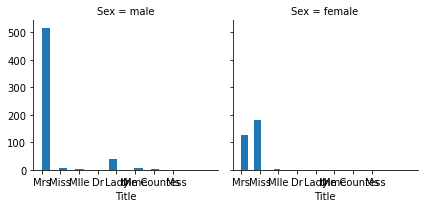

In [52]:
g=sns.FacetGrid(new_data, col="Sex")
g.map(plt.hist, "Title", bins=20)

### Creating a Dictionary

In [54]:
Title_Dictionary={"Capt": "Officer",
                  
                  "Col": "Officer", 
                  
                  "Major": "Officer",
                  
                  "Dr": "Officer", 
                  
                  "Rev": "Officer",
                  
                  "Jonkheer": "Royalty",
                  
                  "Don": "Royalty", 
                  
                  "Sir": "Royalty",
                  
                  "Lady": "Royalty",
                  
                  "the Countess": "Royalty",
                  
                  "Dona": "Royalty", 
                  
                  "Mme": "Miss",
                  
                  "Mlle": "Miss",
                  
                  "Miss": "Miss",
                  
                  "Ms": "Mrs", 
                  
                  "Mr": "Mrs",
                  
                  "Mrs": "Mrs", 
                  
                  "Master": "Master" 
}

### Add the dictionary as a column in the DataFrame

In [55]:
new_data['Title'] = new_data['Title'].map(Title_Dictionary)
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,male,28,0,0,13.0000,S,Mrs
1,0,3,male,25,0,0,7.6500,S,Mrs
2,0,3,male,20,0,0,7.8542,S,Mrs
3,0,3,female,29,0,4,21.0750,S,Mrs
4,0,1,male,31,1,0,52.0000,S,Mrs


In [56]:
print(new_data["Title"].value_counts())

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64


### Visualize using the same correlation

### Between "Age" and "Title"

In [57]:
new_data[["Age", "Title"]].groupby(["Title"], as_index=True).mean()

,Age
Title,
Master,6.925000
Miss,23.200000
Mrs,32.230171
Officer,45.722222
Royalty,41.600000


### Between "Title" and "Fare"

In [58]:
new_data[["Fare", "Title"]].groupby(["Title"], as_index=True).mean()

,Fare
Title,
Master,34.703125
Miss,44.104416
Mrs,28.447283
Officer,35.786344
Royalty,42.150000


### Between "Title" and "Pclass"

In [61]:
new_data[["Pclass", "Title"]].groupby(["Title"], as_index=True).mean()

,Pclass
Title,
Master,2.625000
Miss,2.286486
Mrs,2.329705
Officer,1.444444
Royalty,1.000000


### Between "Title" and "Sex"

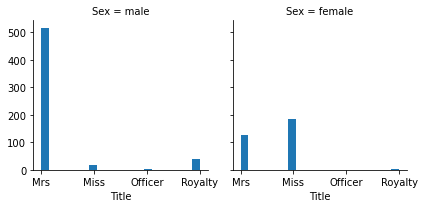

In [63]:
g=sns.FacetGrid(new_data, col="Sex")
g.map(plt.hist, "Title", bins=20)

### Create a new feature "FamilySIze" from "SibSp" and "Parch" features

In [64]:
new_data["FamilySize"]= new_data["SibSp"]+new_data["Parch"]
new_data= new_data.drop("SibSp", axis= 1)
new_data= new_data.drop("Parch", axis= 1)

In [65]:
new_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,2,male,28,13.0000,S,Mrs,0
1,0,3,male,25,7.6500,S,Mrs,0
2,0,3,male,20,7.8542,S,Mrs,0
3,0,3,female,29,21.0750,S,Mrs,4
4,0,1,male,31,52.0000,S,Mrs,1


### Correlation between "FamilySize" and "Survived"

In [66]:
new_data[["Survived", "FamilySize"]].groupby(["FamilySize"], as_index=True).mean()

,Survived
FamilySize,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


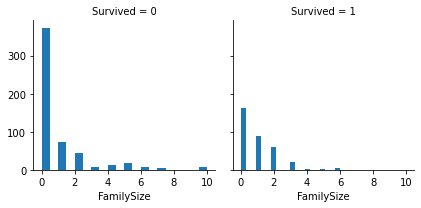

In [67]:
g=sns.FacetGrid(new_data, col="Survived")
g.map(plt.hist, "FamilySize", bins=20)